# Challenge - Implement the Nearest Neighbor Algorithm

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [1]:
#Create class object with 2 methods fit annd predict. The fit will just store the data

#Predict
#1. Map out all the variables and the outcome
#2. Given value want to predcict calculate the distance it is from every point
#3. Take the k closest (top) items and check if jazz or not)
#4. probability will be how many voted for each

In [68]:
###### Imports #########

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

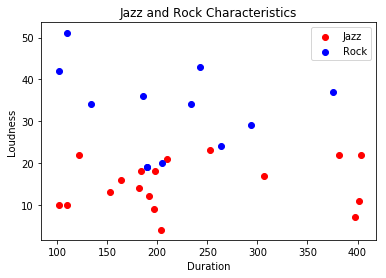

In [3]:
##### Create Data #######

music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [4]:
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


In [62]:
######## Prediction Functions ##########

import math

#Calculate distance
def calc_distance(loudness, duration, p_loudness, p_duration):
    return math.sqrt(math.pow((loudness-p_loudness),2) + math.pow((duration-p_duration),2))
    



#predict
def k_predict(loudness, duration, k):
    #Add distance column
    music['distance'] = music.apply(lambda row: calc_distance(row['loudness'], row['duration'], loudness, duration), axis=1)
    
    #Get closest distance
    smallest = music.nsmallest(k, 'distance')
    #Return the answer
    return smallest['jazz'].value_counts().index.values[0]


#predict probability
def k_predict_proba(loudness, duration, k):
    #Add distance column
    music['distance'] = music.apply(lambda row: calc_distance(row['loudness'], row['duration'], loudness, duration), axis=1)
    
    #Get closest distance
    smallest = music.nsmallest(k, 'distance')
    #Return the answer
    
    answer = smallest['jazz'].value_counts()
    output={}
    for index, value in smallest['jazz'].value_counts().iteritems():
        output[index]="{0:.2f}".format(round(value/k,2))
    
    return output
    

In [63]:
k_predict_proba(24,190,5)

{0: '0.40', 1: '0.60'}

In [64]:
k_predict(24,190,5)

1

### Mesh

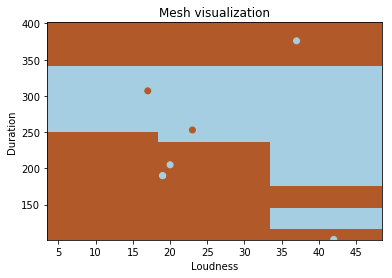

In [73]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 15

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()